In [31]:
import timeit
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import colors
%matplotlib inline

https://gist.github.com/jfpuget/60e07a82dece69b011bb
https://www.ibm.com/developerworks/community/blogs/jfp/entry/How_To_Compute_Mandelbrodt_Set_Quickly?lang=en

In [38]:
def mandelbrot_image(xmin,xmax,ymin,ymax,width=3,height=3,maxiter=80,cmap='hot'):
    dpi = 300
    img_width = dpi * width
    img_height = dpi * height
    x,y,z = mandelbrot_set(xmin,xmax,ymin,ymax,img_width,img_height,maxiter)
    
    fig, ax = plt.subplots(figsize=(width, height),dpi=300)
    ticks = np.arange(0,img_width,3*dpi)
    x_ticks = xmin + (xmax-xmin)*ticks/img_width
    plt.xticks(ticks, x_ticks)
    y_ticks = ymin + (ymax-ymin)*ticks/img_width
    plt.yticks(ticks, y_ticks)
    
    norm = colors.PowerNorm(0.3)
    ax.imshow(z.T,cmap=cmap,origin='lower',norm=norm)

Print a linear version of the mandelbrot set 

In [24]:
from numba import jit

@jit
def mandelbrot(c,maxiter):
    z = c
    for n in range(maxiter):
        if abs(z) > 2:
            return n
        z = z*z + c
    return 0

@jit
def mandelbrot_set(xmin,xmax,ymin,ymax,width,height,maxiter):
    r1 = np.linspace(xmin, xmax, width)
    r2 = np.linspace(ymin, ymax, height)
    n3 = np.empty((width,height))
    for i in range(width):
        for j in range(height):
            n3[i,j] = mandelbrot(r1[i] + 1j*r2[j],maxiter)
    return (r1,r2,n3)



In [32]:
%timeit mandelbrot_set(-2.0,0.5,-1.25,1.25,1000,1000,80)


1 loop, best of 3: 211 ms per loop


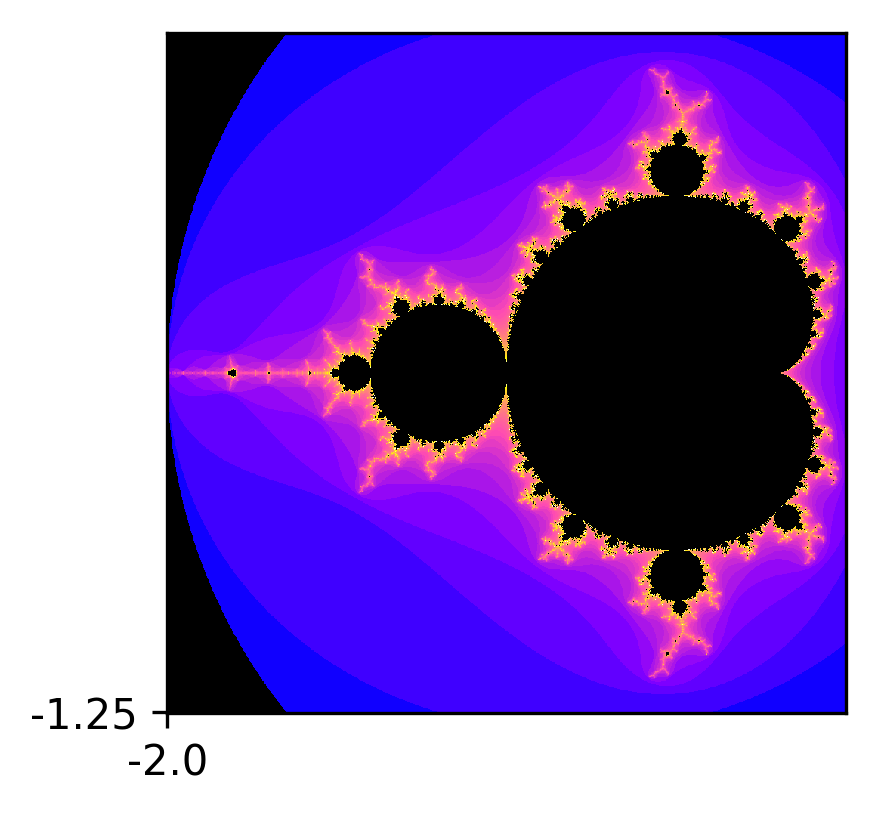

In [39]:
mandelbrot_image(-2.0,0.5,-1.25,1.25,maxiter=80,cmap='gnuplot2')

In [19]:
from numba import jit, vectorize, guvectorize, float64, complex64, int32, float32

@jit(int32(complex64, int32))
def mandelbrot(c,maxiter):
    nreal = 0
    real = 0
    imag = 0
    for n in range(maxiter):
        nreal = real*real - imag*imag + c.real
        imag = 2* real*imag + c.imag
        real = nreal;
        if real * real + imag * imag > 4.0:
            return n
    return 0

@guvectorize([(complex64[:], int32[:], int32[:])], '(n),()->(n)',target='parallel')
def mandelbrot_numpy(c, maxit, output):
    maxiter = maxit[0]
    for i in range(c.shape[0]):
        output[i] = mandelbrot(c[i],maxiter)
        
def mandelbrot_set2(xmin,xmax,ymin,ymax,width,height,maxiter):
    r1 = np.linspace(xmin, xmax, width, dtype=np.float32)
    r2 = np.linspace(ymin, ymax, height, dtype=np.float32)
    c = r1 + r2[:,None]*1j
    n3 = mandelbrot_numpy(c,maxiter)
    return (r1,r2,n3.T) 

In [20]:
%timeit mandelbrot_set2(-2.0,0.5,-1.25,1.25,1000,1000,80)


10 loops, best of 3: 65.4 ms per loop


In [22]:
mandelbrot_set2(-2.0,0.5,-1.25,1.25,1000,1000,80)

(array([ -2.00000000e+00,  -1.99749744e+00,  -1.99499500e+00,
         -1.99249244e+00,  -1.98999000e+00,  -1.98748744e+00,
         -1.98498499e+00,  -1.98248243e+00,  -1.97997999e+00,
         -1.97747743e+00,  -1.97497499e+00,  -1.97247243e+00,
         -1.96996999e+00,  -1.96746743e+00,  -1.96496499e+00,
         -1.96246243e+00,  -1.95995998e+00,  -1.95745742e+00,
         -1.95495498e+00,  -1.95245242e+00,  -1.94994998e+00,
         -1.94744742e+00,  -1.94494498e+00,  -1.94244242e+00,
         -1.93993998e+00,  -1.93743742e+00,  -1.93493497e+00,
         -1.93243241e+00,  -1.92992997e+00,  -1.92742741e+00,
         -1.92492497e+00,  -1.92242241e+00,  -1.91991997e+00,
         -1.91741741e+00,  -1.91491497e+00,  -1.91241241e+00,
         -1.90990996e+00,  -1.90740740e+00,  -1.90490496e+00,
         -1.90240240e+00,  -1.89989984e+00,  -1.89739740e+00,
         -1.89489484e+00,  -1.89239240e+00,  -1.88988984e+00,
         -1.88738739e+00,  -1.88488483e+00,  -1.88238239e+00,
        